This code shows how to use the Keras functional API to build a neural network with three hidden layers with 32, 16 and 8 nodes. The final output node has a sigmoid activation, as we are performing classification task.

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.6.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model #Sequential
from keras.layers import Input, Dense
from keras.utils.vis_utils import plot_model

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# read data from file and convert it to numpy array
input_file = 'income_data.txt'
X,y = [],[]

with open(input_file,'r') as f:
    lines = f.readlines()
    for line in lines:
        if '?' in line:
            continue
        data = line[:-1].split(', ') # last character is a newline char '\n', so skip that. hence the line[:-1]
        # print(data)
        X.append(data)


X_data = []
for x in X[:len(X)-1]:
    X_data.append(x)

X_data = np.array(X_data)
print(X_data.shape)

(30162, 15)


In [4]:
# encode the strings to numeric data. if some data is numeric, leave it alone, else encode it. 
label_encoder = [] 
X_encoded = np.empty(X_data.shape)
for i,item in enumerate(X_data[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X_data[:, i]
    else:
        label_encoder.append(LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X_data[:, i])

XX = X_encoded[:, :-1].astype(int) #these are the data to train the algorithm, leave out the last column for predictors
yy = X_encoded[:, -1].astype(int) #keep the last column for the target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)


In [45]:
inputs = Input(shape=(X_train.shape[1],), name="input")
h1 = Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=inputs, name="hidden_layer_1")(inputs)
h2 = Dense(16, activation='relu', name="hidden_layer_2")(h1)
h3 = Dense(8, activation='relu', name="hidden_layer_3")(h2)
output = Dense(1, activation='sigmoid')(h3)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
 


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14)]              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 32)                480       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 16)                528       
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
print(help(plot_model))

Help on function plot_model in module keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, layer_range=None)
    Converts a Keras model to dot format and save to a file.
    
    Example:
    
    ```python
    input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
    x = tf.keras.layers.Embedding(
        output_dim=512, input_dim=10000, input_length=100)(input)
    x = tf.keras.layers.LSTM(32)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
    model = tf.keras.Model(inputs=[input], outputs=[output])
    dot_img_file = '/tmp/model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
    ```
    
    Args:
      model: A Keras model i

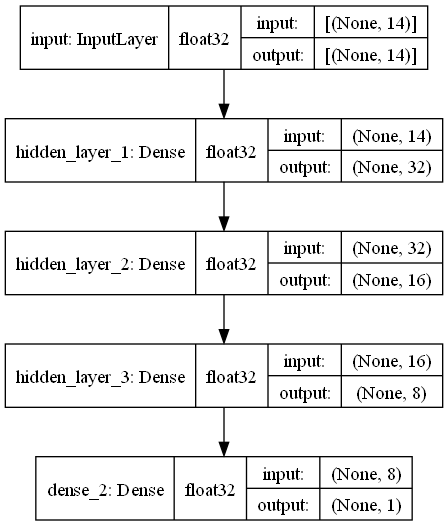

In [69]:
plot_model(model,to_file='income_classifier.png', show_shapes=True, show_dtype=True, show_layer_names=True)


In [54]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
378/378 [==============================] - 1s 2ms/step - loss: 27.2119 - accuracy: 0.6793 - val_loss: 4.1861 - val_accuracy: 0.5921
Epoch 2/50
378/378 [==============================] - 1s 2ms/step - loss: 17.9952 - accuracy: 0.6793 - val_loss: 47.1849 - val_accuracy: 0.7650
Epoch 3/50
378/378 [==============================] - 1s 2ms/step - loss: 19.3678 - accuracy: 0.6865 - val_loss: 15.4734 - val_accuracy: 0.7786
Epoch 4/50
378/378 [==============================] - 1s 2ms/step - loss: 22.6769 - accuracy: 0.6801 - val_loss: 12.4870 - val_accuracy: 0.7862
Epoch 5/50
378/378 [==============================] - 1s 2ms/step - loss: 19.2222 - accuracy: 0.6834 - val_loss: 12.5698 - val_accuracy: 0.7892
Epoch 6/50
378/378 [==============================] - 1s 2ms/step - loss: 19.0335 - accuracy: 0.6873 - val_loss: 3.8685 - val_accuracy: 0.7676
Epoch 7/50
378/378 [==============================] - 1s 2ms/step - loss: 18.6372 - accuracy: 0.6818 - val_loss: 10.6012 - val_accuracy: 0

In [70]:
print(dir(history))
print(history.history)
print(history.params)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']
{'loss': [27.21185302734375, 17.995216369628906, 19.367769241333008, 22.

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss on test: {loss:.2f}, accuracy on test: {accuracy:.2f}')

189/189 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.7799
loss on test: 0.77, accuracy on test: 0.78


In [56]:
predictions = model.predict(X_test)

In [57]:
predictions[np.where(predictions>0.5)]=1
predictions[np.where(predictions<0.5)]=0

In [58]:
print(int(np.sum(predictions[np.where(predictions==1)])))

224


In [59]:
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
print(cm)
print(confusion_matrix(y_test, predictions).ravel()) #this will print true negative, false positive, false negative, true positive

from sklearn.metrics import classification_report
target_names = ['<=50K', '>50K']
print(classification_report(y_test, predictions, target_names = target_names))

[[4492   11]
 [1317  213]]
[4492   11 1317  213]
              precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      4503
        >50K       0.95      0.14      0.24      1530

    accuracy                           0.78      6033
   macro avg       0.86      0.57      0.56      6033
weighted avg       0.82      0.78      0.71      6033



In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(range(50), history.history['loss'],color='red')
ax.plot(range(50), np.array(history.history['accuracy'])*100,color='blue')
ax.plot(range(50), history.history['val_loss'],color='green')
ax.plot(range(50), np.array(history.history['val_accuracy'])*100,color='purple')
ax.set_xlabel("Epoches")
ax.set_ylabel("Loss/Accuracy")
ax.set_title("Training and testing loss/accuracy")
plt.legend(['loss','accuracy','validation_loss','validation_accuracy'])
plt.show()